<a href="https://colab.research.google.com/github/katyayini11/katyayini/blob/master/Katyayini_info5505_Assn1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
#importing dataset
d1=pd.read_csv("monet.csv")
print(d1)

        PRICE  HEIGHT  WIDTH  SIGNED  PICTURE  HOUSE 
0    3.993780    21.3   25.6       1        1       1
1    8.800000    31.9   25.6       1        2       2
2    0.131694     6.9   15.9       0        3       3
3    2.037500    25.7   32.0       1        4       2
4    1.487500    25.7   32.0       1        4       2
..        ...     ...    ...     ...      ...     ...
425  5.282500    25.6   39.4       1      375       1
426  9.352500    25.9   39.6       1      375       2
427  8.252500    25.6   39.6       1      375       1
428  3.410000    25.6   39.4       1      386       2
429  1.542500    25.7   32.0       1      387       1

[430 rows x 6 columns]


In [12]:
d1.tail(7)

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE
423,1.8700,24.0,31.9,1,373,2
424,3.8500,25.6,39.4,1,374,1
425,5.2825,25.6,39.4,1,375,1
426,9.3525,25.9,39.6,1,375,2
427,8.2525,25.6,39.6,1,375,1
428,3.4100,25.6,39.4,1,386,2
429,1.5425,25.7,32.0,1,387,1


In [14]:
d1["SIZE"]=d1["WIDTH"]*d1["HEIGHT"]
d2=d1.drop(["WIDTH","HEIGHT"],axis=1)
d2.tail(5)

,PRICE,SIGNED,PICTURE,HOUSE,SIZE
425,5.2825,1,375,1,1008.64
426,9.3525,1,375,2,1025.64
427,8.2525,1,375,1,1013.76
428,3.4100,1,386,2,1008.64
429,1.5425,1,387,1,822.40


In [15]:
print(d2)

        PRICE  SIGNED  PICTURE  HOUSE      SIZE
0    3.993780       1        1       1   545.28
1    8.800000       1        2       2   816.64
2    0.131694       0        3       3   109.71
3    2.037500       1        4       2   822.40
4    1.487500       1        4       2   822.40
..        ...     ...      ...     ...      ...
425  5.282500       1      375       1  1008.64
426  9.352500       1      375       2  1025.64
427  8.252500       1      375       1  1013.76
428  3.410000       1      386       2  1008.64
429  1.542500       1      387       1   822.40

[430 rows x 5 columns]


In [16]:
#creating the x,y,slope(m) and constant values using the data2(d2)
X=np.vstack([d2.SIZE,np.ones(len(d2.SIZE))]).T
Y = d2.PRICE
m,b = np.linalg.lstsq(X,Y,rcond=-1)[0]

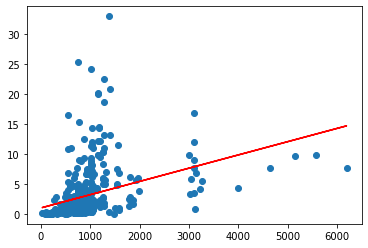

In [19]:
#getting a best fitted line using linear regression model
plt.plot(d2.SIZE,d2.PRICE,'o')
z=d2.SIZE
plt.plot(z,m*z+b,'r')

In [3]:
import sklearn
import math
from sklearn.linear_model import LinearRegression

In [20]:
#fit the linear regresiion model
#giving x_value as="Size" and Y_value as "Price"
lre=LinearRegression()
z_val=d2.drop(['PRICE','SIGNED','HOUSE ','PICTURE'],1)
y_target=d2.PRICE
lre.fit(X,Y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


LinearRegression()

In [24]:
print(lre.intercept_)

1.0082498000380395


In [25]:
X_traindata,X_testdata,y_traindata,y_testdata=sklearn.model_selection.train_test_split(X,d2.PRICE)
print(X_traindata.shape,X_testdata.shape,y_traindata.shape,y_testdata.shape)

(322, 2) (108, 2) (322,) (108,)


In [26]:
#finding the predictions value:
prediction_test=lre.predict(X_testdata)
prediction_train=lre.predict(X_traindata)

In [30]:
print(np.mean((Y_train-prediction_train)**2))
print(math.sqrt(np.mean((Y_train-prediction_train)**2)))

21.778816519927364
4.666777959141335


Estimation of interccept cofficent is: -1.501192030945509


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


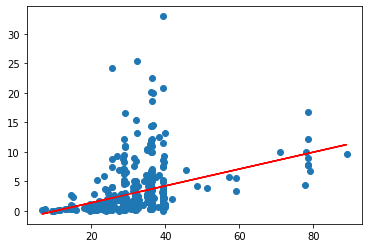

In [34]:
X=np.vstack([d1.WIDTH,np.ones(len(d1.WIDTH))]).T
Y = d1.PRICE
m,b = np.linalg.lstsq(X,Y,rcond=-1)[0]
plt.plot(d1.WIDTH,d1.PRICE,'o')
X=d1.WIDTH
plt.plot(X,m*X+b,'r')
lre=LinearRegression()
X_val=d1.drop(['PRICE','SIGNED','HOUSE ','PICTURE','HEIGHT','SIZE'],1)
Y_target=d1.PRICE
lre.fit(X_val,Y_target)
print("Estimation of interccept cofficent is:",lre.intercept_)

In [36]:
X_traindata,X_testdata,y_traindata,y_testdata=sklearn.model_selection.train_test_split(X_val,d2.PRICE)
print(np.mean((y_test-prediction_test)**2))
print(math.sqrt(np.mean((y_test-prediction_test)**2)))

15.930802067082503
3.9913408858530866


In [37]:
print(np.mean((y_train-prediction_train)**2))
print(math.sqrt(np.mean((y_train-prediction_train)**2)))

23.577618393423407
4.855678983769768


In [39]:
#creating multivarient linear regression model
import sklearn
import math
from sklearn.linear_model import LinearRegression
X_val=d1.drop(['PRICE'],1)
Y_target=d1.PRICE
lre.fit(X_val,Y_target)
print("Estimation of interccept cofficent is:",lre.intercept_)
X_train,X_test,y_train,y_test=sklearn.model_selection.train_test_split(X_val,d2.PRICE)
print("Mean Square Value of test data with Prediction data: ",np.mean((y_test-prediction_test)**2))
print("RMSE value for test with prediction data is: ",math.sqrt(np.mean((y_test-prediction_test)**2)))
print("Mean Square Value of train data with Prediction data: ",np.mean((y_train-prediction_train)**2))
print("RMSE value for train with prediction data is: ",math.sqrt(np.mean((y_train-prediction_train)**2)))

Estimation of interccept cofficent is: -7.491489501003282
Mean Square Value of test data with Prediction data:  21.843127573323187
RMSE value for test with prediction data is:  4.673663185695262
Mean Square Value of train data with Prediction data:  19.07819794478301
RMSE value for train with prediction data is:  4.367859652596797


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """
